<a href="https://colab.research.google.com/github/vitordutra/automatic-text-summarization/blob/main/Sumariza%C3%A7%C3%A3o_com_o_Algoritmo_de_Luhn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sumarização de textos com o Algoritmo de Luhn

- https://courses.ischool.berkeley.edu/i256/f06/papers/luhn58.pdf

## Preparação do texto de exemplo

In [ ]:
import re
import nltk
import string
import heapq

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
texto_original = """A inteligência artificial é a inteligência similar à humana máquinas. 
                    Definem como o estudo de agente artificial com inteligência. 
                    Ciência e engenharia de produzir máquinas com inteligência. 
                    Resolver problemas e possuir inteligência. 
                    Relacionada ao comportamento inteligente. 
                    Construção de máquinas para raciocinar. 
                    Aprender com os erros e acertos. 
                    Inteligência artificial é raciocinar nas situações do cotidiano."""
texto_original = re.sub(r'\s+', ' ', texto_original)
texto_original

'A inteligência artificial é a inteligência similar à humana máquinas. Definem como o estudo de agente artificial com inteligência. Ciência e engenharia de produzir máquinas com inteligência. Resolver problemas e possuir inteligência. Relacionada ao comportamento inteligente. Construção de máquinas para raciocinar. Aprender com os erros e acertos. Inteligência artificial é raciocinar nas situações do cotidiano.'

In [ ]:
stopwords = nltk.corpus.stopwords.words('portuguese')
print(stopwords)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [ ]:
stopwords.append('ser')
stopwords.append('além')

In [ ]:
print(stopwords)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [ ]:
def preprocessamento(texto):
  texto_formatado = texto.lower()
  tokens = []
  for token in nltk.word_tokenize(texto_formatado):
    tokens.append(token)

  tokens = [palavra for palavra in tokens if palavra not in stopwords and palavra not in string.punctuation]
  texto_formatado = ' '.join([str(elemento) for elemento in tokens if not elemento.isdigit()])

  return texto_formatado

## Função para calcular a nota das sentenças

In [ ]:
teste = ['a', 'b', 'c']
teste.index('g')

In [ ]:
def calcula_nota_sentenca(sentencas, palavras_importantes, distancia):
  notas = []
  indice_sentenca = 0

  for sentenca in [nltk.word_tokenize(sentenca.lower()) for sentenca in sentencas]:
    #print('---------------')
    #print(sentenca)
    indice_palavra = []
    for palavra in palavras_importantes:
      #print(palavra)
      try:
        indice_palavra.append(sentenca.index(palavra))
      except ValueError:
        pass
    
    indice_palavra.sort()
    #print(indice_palavra)

    if len(indice_palavra) == 0:
      continue

    # [0, 1, 3, 5]
    lista_grupos = []
    grupo = [indice_palavra[0]]
    i = 1
    while i < len(indice_palavra):
      if indice_palavra[i] - indice_palavra[i - 1] < distancia:
        grupo.append(indice_palavra[i])
        #print('grupo: ', grupo)
      else:
        lista_grupos.append(grupo[:])
        grupo = [indice_palavra[i]]
        #print('grupo: ', grupo)
      i += 1
    lista_grupos.append(grupo)
    #print('todos os grupos: ', lista_grupos)

    nota_maxima_grupo = 0
    for g in lista_grupos:
      #print(g)
      palavras_importantes_no_grupo = len(g)
      total_palavras_no_grupo = g[-1] - g[0] + 1
      #print('palavras importantes no grupo ', palavras_importantes_no_grupo)
      #print('total de palavras ', total_palavras_no_grupo)
      nota = 1.0 * palavras_importantes_no_grupo**2 / total_palavras_no_grupo
      #print('nota grupo', nota)

      if nota > nota_maxima_grupo:
        nota_maxima_grupo = nota

    notas.append((nota_maxima_grupo, indice_sentenca))
    indice_sentenca += 1

  #print('notas finais das senteças', notas)
  return notas

In [ ]:
teste = [0, 1, 3, 4, 6, 9]
teste[-1], teste[0] + 1

(9, 1)

## Função para sumarizar os textos

In [ ]:
def sumarizar(texto, top_n_palavras, distancia, quantidade_sentencas):
  sentencas_originais = [sentenca for sentenca in nltk.sent_tokenize(texto)]
  #print(sentencas_originais)
  sentencas_formatadas = [preprocessamento(sentenca_original) for sentenca_original in sentencas_originais]
  #print(sentencas_formatadas)
  palavras = [palavra for sentenca in sentencas_formatadas for palavra in nltk.word_tokenize(sentenca)]
  #print(palavras)
  frequencia = nltk.FreqDist(palavras)
  #return frequencia
  top_n_palavras = [palavra[0] for palavra in frequencia.most_common(top_n_palavras)]
  #print(top_n_palavras)
  notas_sentencas = calcula_nota_sentenca(sentencas_formatadas, top_n_palavras, distancia)
  #print(notas_sentencas)
  melhores_sentencas = heapq.nlargest(quantidade_sentencas, notas_sentencas)
  #print(melhores_sentencas)
  melhores_sentencas = [sentencas_originais[i] for (nota, i) in melhores_sentencas]
  #print(melhores_sentencas)
  #print(sentencas_originais)
  return sentencas_originais, melhores_sentencas, notas_sentencas

In [ ]:
sentencas_originais, melhores_sentencas, notas_sentencas = sumarizar(texto_original, 5, 3, 3)

In [ ]:
sentencas_originais

['A inteligência artificial é a inteligência similar à humana máquinas.',
 'Definem como o estudo de agente artificial com inteligência.',
 'Ciência e engenharia de produzir máquinas com inteligência.',
 'Resolver problemas e possuir inteligência.',
 'Relacionada ao comportamento inteligente.',
 'Construção de máquinas para raciocinar.',
 'Aprender com os erros e acertos.',
 'Inteligência artificial é raciocinar nas situações do cotidiano.']

In [ ]:
melhores_sentencas

['Construção de máquinas para raciocinar.',
 'A inteligência artificial é a inteligência similar à humana máquinas.',
 'Relacionada ao comportamento inteligente.']

In [ ]:
notas_sentencas

[(2.6666666666666665, 0), (2.0, 1), (2.0, 2), (1.0, 3), (2.0, 4), (3.0, 5)]

## Visualização do resumo

In [ ]:
def visualiza_resumo(titulo, lista_sentencas, melhores_sentencas):
  from IPython.core.display import HTML
  texto = ''

  display(HTML(f'<h1>Resumo do texto - {titulo}</h1>'))
  for i in lista_sentencas:
    if i in melhores_sentencas:
      texto += str(i).replace(i, f"<mark>{i}</mark>")
    else:
      texto += i
  display(HTML(f""" {texto} """))

In [ ]:
visualiza_resumo('Teste', sentencas_originais, melhores_sentencas)

## Extração de texto da internet

In [ ]:
!pip install goose3

In [ ]:
from goose3 import Goose

In [ ]:
g = Goose()
url = 'https://iaexpert.academy/2020/11/09/ia-preve-resultado-das-eleicoes-americanas/'
artigo = g.extract(url)

In [ ]:
artigo.cleaned_text

'Nas eleições presidenciais americanas de 2016, a maioria das predições apontavam para a vitória de Hillary Clinton. Entretanto, a história nos mostrou o resultado oposto, e Donald Trump foi o presidente nos últimos 4 anos. Desta vez, os estatísticos reexaminaram seus modelos, para aumentar o grau de confiabilidade nos seus resultados. Nesta tentativa de otimização das predições, a inteligência artificial certamente não ficou de fora.\n\nO modelo desenvolvido pelo Dr. Hernan Makse, físico estatístico da Universidade da Cidade de Nova York, baseou suas predições em uma rede neural treinada para processar os sentimentos expressos nas redes sociais. O algoritmo fez a análise de cerca de 1 bilhão de tweets para chegar a uma estimativa dos resultados do pleito. No dia da eleição, 3 de novembro, o modelo estava indicando a vitória de Joe Biden.\n\nO Dr. Makse disse que seu trabalho começou já na eleição de 2016, e foi testado novamente nas eleições na Argentina ano passado. Desta vez, o mode

In [ ]:
sentencas_originais, melhores_sentencas, notas_sentencas = sumarizar(artigo.cleaned_text, 300, 10, 5)

In [ ]:
sentencas_originais

['Nas eleições presidenciais americanas de 2016, a maioria das predições apontavam para a vitória de Hillary Clinton.',
 'Entretanto, a história nos mostrou o resultado oposto, e Donald Trump foi o presidente nos últimos 4 anos.',
 'Desta vez, os estatísticos reexaminaram seus modelos, para aumentar o grau de confiabilidade nos seus resultados.',
 'Nesta tentativa de otimização das predições, a inteligência artificial certamente não ficou de fora.',
 'O modelo desenvolvido pelo Dr. Hernan Makse, físico estatístico da Universidade da Cidade de Nova York, baseou suas predições em uma rede neural treinada para processar os sentimentos expressos nas redes sociais.',
 'O algoritmo fez a análise de cerca de 1 bilhão de tweets para chegar a uma estimativa dos resultados do pleito.',
 'No dia da eleição, 3 de novembro, o modelo estava indicando a vitória de Joe Biden.',
 'O Dr. Makse disse que seu trabalho começou já na eleição de 2016, e foi testado novamente nas eleições na Argentina ano pas

In [ ]:
melhores_sentencas

['O modelo desenvolvido pelo Dr. Hernan Makse, físico estatístico da Universidade da Cidade de Nova York, baseou suas predições em uma rede neural treinada para processar os sentimentos expressos nas redes sociais.',
 'O trabalho não depende apenas da coleta dos dados, mas também de um tratamento estatístico adequado para levar em consideração duas variáveis externas: o viés de amostragem e a taxa de comparecimento.',
 'O Dr. Makse disse que seu trabalho começou já na eleição de 2016, e foi testado novamente nas eleições na Argentina ano passado.',
 'Desta vez, o modelo está treinando com cerca de 5 vezes mais dados que nas eleições americanas anteriores.',
 'O algoritmo fez a análise de cerca de 1 bilhão de tweets para chegar a uma estimativa dos resultados do pleito.']

In [ ]:
notas_sentencas

[(9.0, 0),
 (10.0, 1),
 (9.0, 2),
 (8.0, 3),
 (21.0, 4),
 (10.0, 5),
 (8.0, 6),
 (12.0, 7),
 (10.0, 8),
 (13.0, 9),
 (3.2, 10),
 (4.764705882352941, 11),
 (3.272727272727273, 12),
 (4.9, 13),
 (1.0, 14),
 (1.5, 15),
 (3.2666666666666666, 16),
 (1.3333333333333333, 17),
 (2.6666666666666665, 18)]

In [ ]:
visualiza_resumo(artigo.title, sentencas_originais, melhores_sentencas)

## Leitura de artigos de feed de notícias (RSS)

In [ ]:
!pip install feedparser

In [ ]:
import feedparser

In [ ]:
from bs4 import BeautifulSoup
import os
import json

In [ ]:
url = 'https://iaexpert.academy/feed/'
feed = feedparser.parse(url)

In [ ]:
feed.entries

In [ ]:
for e in feed.entries:
  print(e.title)
  print(e.links[0].href)
  print(e.content[0].value)

G1 usa IA para publicar resultados das eleições em todos os municípios brasileiros
https://iaexpert.academy/2020/11/23/g1-usa-ia-publicar-resultados-eleicoes-todos-municipios-brasileiros/?utm_source=rss&utm_medium=rss&utm_campaign=g1-usa-ia-publicar-resultados-eleicoes-todos-municipios-brasileiros
<p>Pela primeira vez, um portal de notícias brasileiro usou inteligência artificial para divulgar os resultados das eleições em todos os municípios, de forma personalizada. O G1, da empresa Globo, publicou entre os dias 15 e 16 (dia da votação e o seguinte) um texto discriminando os candidatos vencedores, seus dados públicos, dados gerais sobre o resultado e informações sobre coligações políticas, além de dados relevantes ao segundo turno onde é o caso, em 5567 dos 5568 cidades do país &#8211; só ficou de fora Macapá, onde as eleições foram adiadas devido à falta de energia elétrica no estado.</p>



<p>Esta realização foi possível graças a uma colaboração entre a central de jornalismo e a ár

In [ ]:
e.content[0].value

'<p>Veja nesta aula informações sobre o conteúdo do curso &#8220;Ciência de Dados para Empresas e Negócios&#8221;. </p>\n\n\n\n<p>O curso está disponível para <a href="https://iaexpert.academy/assinatura" rel="noreferrer noopener" target="_blank">assinantes</a> IA Expert Academy.</p>\n\n\n\n<p>Curso na <a href="https://www.udemy.com/course/ciencia-de-dados-para-empresas-e-negocios/?referralCode=0B9EE94FE00E3CE3D793" rel="noreferrer noopener" target="_blank">Udemy.</a></p>\n\n\n\n<figure class="wp-block-embed-youtube wp-block-embed is-type-video is-provider-youtube wp-embed-aspect-4-3 wp-has-aspect-ratio"><div class="wp-block-embed__wrapper">\n\n</div></figure>'

In [ ]:
def limpa_html(texto):
  if texto == '':
    return ''
  return BeautifulSoup(texto, 'html5lib').get_text()

In [ ]:
limpa_html(e.content[0].value)

'Veja nesta aula informações sobre o conteúdo do curso “Ciência de Dados para Empresas e Negócios”. \n\n\n\nO curso está disponível para assinantes IA Expert Academy.\n\n\n\nCurso na Udemy.\n\n\n\n\n\n'

In [ ]:
artigos = []
for e in feed.entries:
  artigos.append({'titulo': e.title, 'conteudo': limpa_html(e.content[0].value)})

In [ ]:
artigos

[{'conteudo': 'Pela primeira vez, um portal de notícias brasileiro usou inteligência artificial para divulgar os resultados das eleições em todos os municípios, de forma personalizada. O G1, da empresa Globo, publicou entre os dias 15 e 16 (dia da votação e o seguinte) um texto discriminando os candidatos vencedores, seus dados públicos, dados gerais sobre o resultado e informações sobre coligações políticas, além de dados relevantes ao segundo turno onde é o caso, em 5567 dos 5568 cidades do país – só ficou de fora Macapá, onde as eleições foram adiadas devido à falta de energia elétrica no estado.\n\n\n\nEsta realização foi possível graças a uma colaboração entre a central de jornalismo e a área de tecnologia da empresa. O pessoal responsável criou nos meses anteriores à eleição uma base de dados com as informações relevantes coletadas do Tribunal Superior Eleitoral (TSE), adaptada para ser utilizada na etapa seguinte. Algoritmos de processamento de linguagem natural foram empregados

In [ ]:
arquivo_gravar = os.path.join('feed_iaexpert.json')
arquivo = open(arquivo_gravar, 'w+')
arquivo.write(json.dumps(artigos, indent=1))
arquivo.close()

In [ ]:
artigos_blog = json.loads(open('/content/feed_iaexpert.json').read())
artigos_blog

[{'conteudo': 'Pela primeira vez, um portal de notícias brasileiro usou inteligência artificial para divulgar os resultados das eleições em todos os municípios, de forma personalizada. O G1, da empresa Globo, publicou entre os dias 15 e 16 (dia da votação e o seguinte) um texto discriminando os candidatos vencedores, seus dados públicos, dados gerais sobre o resultado e informações sobre coligações políticas, além de dados relevantes ao segundo turno onde é o caso, em 5567 dos 5568 cidades do país – só ficou de fora Macapá, onde as eleições foram adiadas devido à falta de energia elétrica no estado.\n\n\n\nEsta realização foi possível graças a uma colaboração entre a central de jornalismo e a área de tecnologia da empresa. O pessoal responsável criou nos meses anteriores à eleição uma base de dados com as informações relevantes coletadas do Tribunal Superior Eleitoral (TSE), adaptada para ser utilizada na etapa seguinte. Algoritmos de processamento de linguagem natural foram empregados

## Nuvem de palavras

In [ ]:
artigos_blog[0]['titulo']

'G1 usa IA para publicar resultados das eleições em todos os municípios brasileiros'

In [ ]:
conteudo_feed = ''
for artigo in artigos_blog:
  conteudo_feed += artigo['conteudo']

In [ ]:
conteudo_feed

'Pela primeira vez, um portal de notícias brasileiro usou inteligência artificial para divulgar os resultados das eleições em todos os municípios, de forma personalizada. O G1, da empresa Globo, publicou entre os dias 15 e 16 (dia da votação e o seguinte) um texto discriminando os candidatos vencedores, seus dados públicos, dados gerais sobre o resultado e informações sobre coligações políticas, além de dados relevantes ao segundo turno onde é o caso, em 5567 dos 5568 cidades do país – só ficou de fora Macapá, onde as eleições foram adiadas devido à falta de energia elétrica no estado.\n\n\n\nEsta realização foi possível graças a uma colaboração entre a central de jornalismo e a área de tecnologia da empresa. O pessoal responsável criou nos meses anteriores à eleição uma base de dados com as informações relevantes coletadas do Tribunal Superior Eleitoral (TSE), adaptada para ser utilizada na etapa seguinte. Algoritmos de processamento de linguagem natural foram empregados para utilizar

In [ ]:
conteudo_feed_formatado = preprocessamento(conteudo_feed)
conteudo_feed_formatado

'primeira vez portal notícias brasileiro usou inteligência artificial divulgar resultados eleições todos municípios forma personalizada g1 empresa globo publicou dias dia votação seguinte texto discriminando candidatos vencedores dados públicos dados gerais sobre resultado informações sobre coligações políticas dados relevantes segundo turno onde caso cidades país – ficou macapá onde eleições adiadas devido falta energia elétrica estado realização possível graças colaboração central jornalismo área tecnologia empresa pessoal responsável criou meses anteriores eleição base dados informações relevantes coletadas tribunal superior eleitoral tse adaptada utilizada etapa seguinte algoritmos processamento linguagem natural empregados utilizar informações redação textos corridos mantendo coesão coerência linguística primeira vez iniciativa realizada textos revisados complementados necessário antes publicação portal último resultado disponibilizado segunda 19h59 após finalização apuração soluç

In [ ]:
len(conteudo_feed), len(conteudo_feed_formatado)

(19428, 14664)

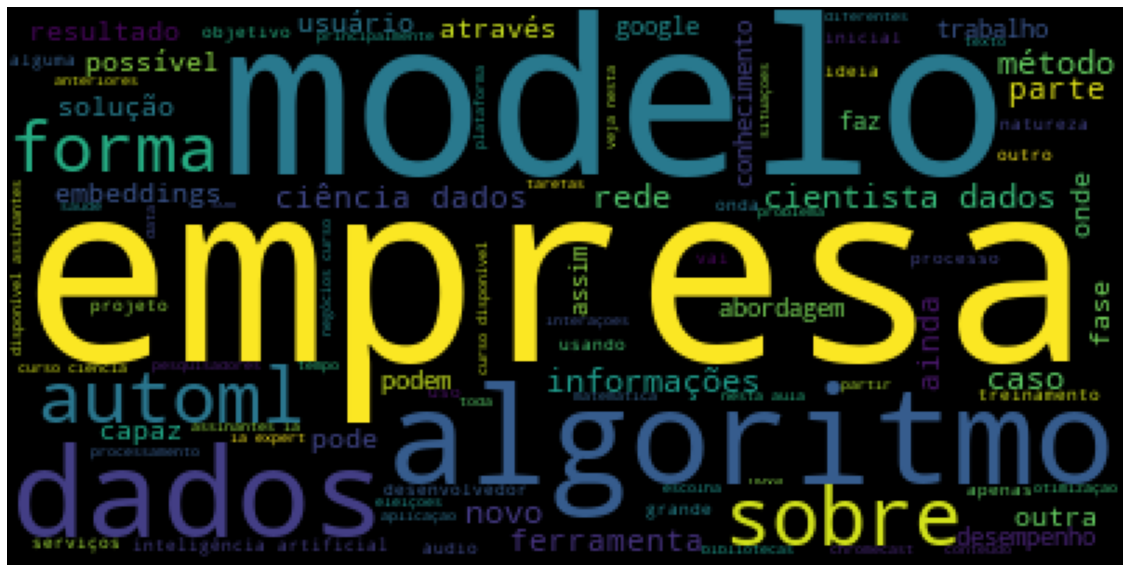

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(WordCloud().generate(conteudo_feed_formatado))

## Extração de entidades nomeadas

- Siglas: https://spacy.io/api/annotation#named-entities

In [ ]:
import spacy

In [ ]:
!python -m spacy download pt

In [ ]:
pln = spacy.load('pt')
pln

In [ ]:
documento = pln(conteudo_feed_formatado)

In [ ]:
from spacy import displacy
displacy.render(documento, style = 'ent', jupyter = True)

In [ ]:
for entidade in documento.ents:
  if entidade.label_ == 'LOC':
    print(entidade.text, entidade.label_)

macapá LOC
israel LOC
israel LOC
braçal LOC
estados unidos LOC
brasil LOC


## Sumarização de artigos de feed de notícias

In [ ]:
for artigo in artigos_blog:
  #print(artigo['titulo'])
  #print(artigo['conteudo'])
  sentencas_originais, melhores_sentencas, _ = sumarizar(artigo['conteudo'], 150, 10, 5)
  visualiza_resumo(artigo['titulo'], sentencas_originais, melhores_sentencas)
  salva_resumo(artigo['titulo'], sentencas_originais, melhores_sentencas)

## Geração de arquivos HTML

In [ ]:
def salva_resumo(titulo, lista_sentencas, melhores_sentencas):
  HTML_TEMPLATE = """<html>
    <head>
      <title>{0}</title>
      <meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
    </head>
    <body>{1}</body>

  </html>"""
  texto = ''
  for i in lista_sentencas:
    if i in melhores_sentencas:
      texto += str(i).replace(i, f"<mark>{i}</mark>")
    else:
      texto += i

  arquivo = open(os.path.join(titulo + '.html'), 'wb')
  html = HTML_TEMPLATE.format(titulo + ' - resumo', texto)
  arquivo.write(html.encode('utf-8'))
  arquivo.close()

## Solução para o exercício - lematização

In [ ]:
pln = spacy.load('pt')
pln

In [ ]:
def preprocessamento_lematizacao(texto):
  texto = texto.lower()
  texto = re.sub(r" +", ' ', texto)

  documento = pln(texto)
  tokens = []
  for token in documento:
    tokens.append(token.lemma_)
  
  tokens = [palavra for palavra in tokens if palavra not in stopwords and palavra not in string.punctuation]
  texto_formatado = ' '.join([str(elemento) for elemento in tokens if not elemento.isdigit()])
  
  return texto_formatado

In [ ]:
def sumarizar_lematizacao(texto, top_n_palavras, distancia, quantidade_sentencas):
  sentencas_originais = [sentenca for sentenca in nltk.sent_tokenize(texto)]
  sentencas_formatadas = [preprocessamento_lematizacao(sentenca_original) for sentenca_original in sentencas_originais]
  palavras = [palavra.lower() for sentenca in sentencas_formatadas for palavra in nltk.tokenize.word_tokenize(sentenca)]
  frequencia = nltk.FreqDist(palavras)
  top_n_palavras = [palavra[0] for palavra in frequencia.most_common(top_n_palavras)]
  notas_sentencas = calcula_nota_sentenca(sentencas_formatadas, top_n_palavras, distancia)
  melhores_sentencas = heapq.nlargest(quantidade_sentencas, notas_sentencas)
  melhores_sentencas = [sentencas_originais[i] for (nota, i) in melhores_sentencas]
  
  return sentencas_originais, melhores_sentencas, notas_sentencas

In [ ]:
artigos_blog[0]['conteudo']

'Pela primeira vez, um portal de notícias brasileiro usou inteligência artificial para divulgar os resultados das eleições em todos os municípios, de forma personalizada. O G1, da empresa Globo, publicou entre os dias 15 e 16 (dia da votação e o seguinte) um texto discriminando os candidatos vencedores, seus dados públicos, dados gerais sobre o resultado e informações sobre coligações políticas, além de dados relevantes ao segundo turno onde é o caso, em 5567 dos 5568 cidades do país – só ficou de fora Macapá, onde as eleições foram adiadas devido à falta de energia elétrica no estado.\n\n\n\nEsta realização foi possível graças a uma colaboração entre a central de jornalismo e a área de tecnologia da empresa. O pessoal responsável criou nos meses anteriores à eleição uma base de dados com as informações relevantes coletadas do Tribunal Superior Eleitoral (TSE), adaptada para ser utilizada na etapa seguinte. Algoritmos de processamento de linguagem natural foram empregados para utilizar

In [ ]:
sentencas_originais, melhores_sentencas, _ = sumarizar(artigos_blog[0]['conteudo'], 300, 5, 5)
visualiza_resumo(artigos_blog[0]['titulo'], sentencas_originais, melhores_sentencas)

In [ ]:
sentencas_originais, melhores_sentencas, _ = sumarizar_lematizacao(artigos_blog[0]['conteudo'], 300, 5, 5)
visualiza_resumo(artigos_blog[0]['titulo'], sentencas_originais, melhores_sentencas)